# Library Imports
- This will import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sets up the data sets to be used

# data source:
# https://catalog.data.gov/dataset/illinois-population-1991-1999-30290
old_data = pd.read_csv('data/Illinois_Population__1991-1999.csv')

# data source:
# https://catalog.data.gov/dataset/illinois-population-2000-2009-b6d2b
new_data = pd.read_csv('data/Illinois_Population__2000-2009.csv')

# data source:
# http://www.zillow.com/research/data/
prices = pd.read_csv('data/ZHVI_vals.csv')

# sets a map to a county and its corresponding index
counties_list = list(old_data['County'][1:])
indices = np.array([i for i in range(len(counties_list))]) + 1
county_data = dict(zip(counties_list, indices))

county = 'Champaign'

## Helper Functions - Population
    These functions are some helper functions that help in handling the population data

In [3]:
# returns the first row in population CSV (the header)

def return_year_list_pop(data_set):
    first_row = list(data_set.head(1))[1:]
    return np.array(list(map(int, first_row)))

In [4]:
# updates the width and height of the plot

def set_size(width, height):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = float(width)
    fig_size[1] = float(height)
    plt.rcParams["figure.figsize"] = fig_size

In [5]:
# prints out the county list

def county_list():
    l = list(county.keys())
    for i in l:
        print(i)

## Helper Functions - Home Prices
    These functions are some helper functions that help in handling the home price data

In [6]:
def price_for_year(dictionary):
    ret = dict()
    for k, v in dictionary.items():
        year = str(k)[:4]
        curr_list = ret.get(year, list())
        curr_list.append(dictionary.get(k, 0))
        ret[year] = curr_list
    for k, v in ret.items():
        curr_list = ret[k]
        curr_list = np.array(curr_list)
        curr_list = np.nan_to_num(curr_list)
        ret[k] = np.array(curr_list)
    return ret

## Code Cell below will display the plot

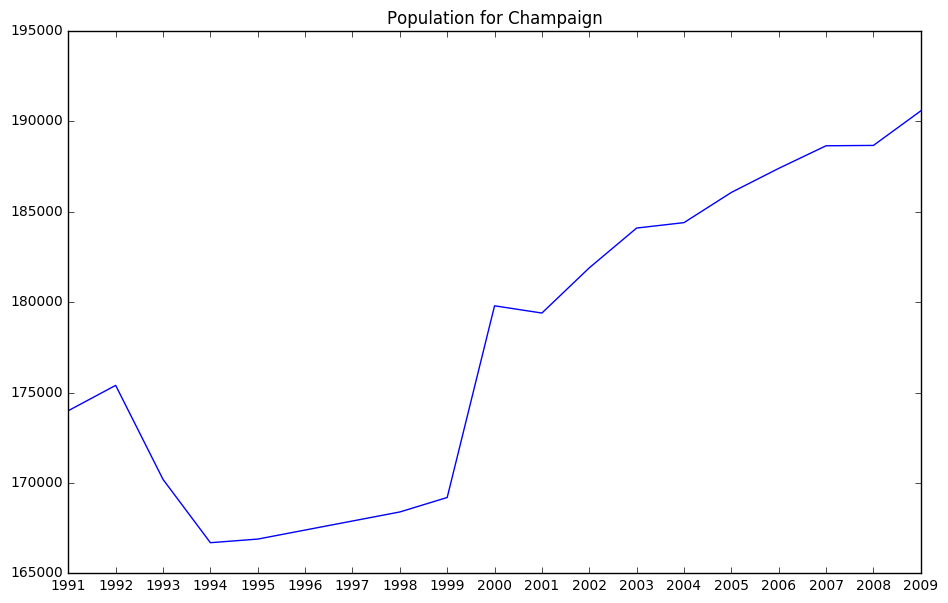

1996: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1997: [87800.0, 0.0, 87900.0, 87200.0, 86900.0, 78800.0, 88800.0, 88900.0, 81800.0, 86000.0, 88300.0, 84300.0]
1998: [82100.0, 80600.0, 81000.0, 83300.0, 82000.0, 82800.0, 84300.0, 81400.0, 85200.0, 80800.0, 83700.0, 86200.0]
1999: [89000.0, 89300.0, 89700.0, 88000.0, 84800.0, 90200.0, 86900.0, 89200.0, 85800.0, 88700.0, 90000.0, 88900.0]
2000: [90000.0, 90000.0, 92800.0, 90200.0, 90200.0, 90500.0, 92000.0, 92300.0, 92100.0, 91300.0, 93200.0, 91700.0]
2001: [99200.0, 96300.0, 99700.0, 94900.0, 99000.0, 97400.0, 93700.0, 98100.0, 99800.0, 98700.0, 99300.0, 99000.0]
2002: [104900.0, 105500.0, 99700.0, 102100.0, 101500.0, 99200.0, 106200.0, 107300.0, 104000.0, 100600.0, 102900.0, 101100.0]
2003: [108100.0, 109000.0, 108600.0, 111100.0, 113100.0, 115300.0, 110200.0, 114300.0, 109600.0, 112000.0, 116000.0, 116800.0]
2004: [120500.0, 118600.0, 117600.0, 119000.0, 119000.0, 118500.0, 123200.0, 119500.0, 121600.0, 118100.0, 122300.0, 118900.0

In [7]:
# gets the population data ready
x_axis_old = return_year_list_pop(old_data)
x_axis_new = return_year_list_pop(new_data)
years_list = np.array(list(x_axis_old) + list(x_axis_new))
row_old = list(old_data.loc[old_data['County'] == county].iloc[0])
row_new = list(new_data.loc[new_data['County'] == county].iloc[0])
city_name = row_old[0]
del row_new[0]
city_pop = row_old[1:] + row_new[:]
city_pop = [float(i) for i in city_pop]

# gets the home price data ready
county_price = prices.loc[prices['RegionName'] == county].iloc[0]
total_price_dict = dict(county_price)
price_dict = price_for_year(total_price_dict)   
# county_price = np.array(county_price.fillna(value=0, inplace=False))
# county_price = np.delete(county_price, 0)
# print(county_price)

# sets up the plot
set_size(11, 7)
plt.title('Population for ' + str(city_name))
x = [i for i in range(19)]
plt.xticks(x, years_list)
plt.plot(city_pop)
plt.show()

for i in range(1996, 2017):
    t = list(price_dict.get(str(i)))
    print(str(i) + ': ' + str(t))

In [8]:
prices

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11
0,Cook,128700.0,129000.0,128900.0,128600.0,128400.0,128400.0,128500.0,128800.0,129000.0,...,197200,198500,200200,201000,201600,202300,203100,203700,204800,205800
1,Du Page,161200.0,161000.0,161200.0,161500.0,162100.0,162700.0,163000.0,163300.0,163800.0,...,261900,262700,263600,264400,264800,265000,266000,268300,270900,272500
2,Lake,170700.0,170400.0,169800.0,168800.0,167800.0,167100.0,167000.0,167500.0,168000.0,...,225100,226200,227000,228000,228400,228100,228200,229300,230500,231200
3,Will,131900.0,131600.0,131700.0,132000.0,132500.0,133000.0,133500.0,133900.0,134300.0,...,191400,191700,191500,191800,192800,193900,195200,196300,196700,197100
4,Kane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,201500,201400,201900,203100,204200,204800,205300,206100,207500,208700
5,McHenry,151500.0,151300.0,151300.0,151500.0,151500.0,151400.0,151300.0,151300.0,151500.0,...,188300,189700,191300,192600,193000,192700,192800,193700,195500,197200
6,Winnebago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91900,93100,94300,95000,95300,95600,96000,96800,97400,97800
7,Saint Clair,67300.0,67400.0,67700.0,68700.0,69600.0,69700.0,69900.0,70300.0,70300.0,...,88100,89100,90300,90900,91400,92000,92700,93100,93500,93800
8,Champaign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,133900,133600,133300,133300,133500,134000,134200,134000,134100,134400
9,Sangamon,83900.0,84700.0,85400.0,85900.0,85900.0,86100.0,86500.0,87000.0,87000.0,...,121300,121400,121100,120700,120900,121400,122000,122400,122600,122700
